# Análisis de variables categóricas o relación entre variables categóricas

Al igual que con las variables numéricas, vamos a plantear una serie de preguntas para aprender a usar este tipo de gráficas. Las preguntas son:


- ¿Cuál es el nivel educativo (`education`) más común? Con esta pregunta podremos saber que perfil educativo domina más entre nuestros clientes. 


- ¿Depende el nivel educativo de los clientes en que acepten o no una oferta (`y`)? En este caso podríamos ver que tipo de clientes aceptan o no la oferta. 


- ¿Depende el hecho de haber aceptado o no una oferta en el pasado (`poutcome`) en que acepten o no una oferta (`y`)? En este caso podríamos ver que tipo de clientes aceptan o no la oferta. 



## Countplot

Es una visualización específica que se utiliza para mostrar la frecuencia de observaciones en diferentes categorías. Este tipo de gráfico es especialmente útil cuando deseas contar y comparar cuántas veces aparece cada categoría en una variable categórica. 

La sintaxis del `countplot` de Seaborn es bastante sencilla. Aquí tienes la estructura básica:

```python
sns.countplot(x, data, palette, color, hue, orient)
```


In [1]:
# primero nuestras librerias!

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [23]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("bank-additional-clean-nonulls.csv") 

In [3]:
# recordamos el DataFrame
df.head(2)

,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,empvarrate,conspriceidx,consconfidx,nremployed,y,date,latitude,longitude,contact_month,contact_year,age_cat,hijos_totales,age,euribor3m,pdays
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,housemaid,married,basic 4y,No,No,No,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,5191,no,2-agosto-2019,41.495,-71.233,agosto,2019.0,Adultos mayores,1 hijos,40.005436,4.857000,4.4
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,services,married,high school,No,No,No,telephone,149,1,0,nonexistent,1.1,93.994,-36.4,5191,no,14-septiembre-2016,34.601,-83.923,septiembre,2016.0,Mediana edad,2 hijos,57.000000,3.603174,4.8


Para empezar a familiarizarnos con este tipo de gráfica vamos a contestar a la siguiente pregunta: 

> ¿Cuál es el nivel educativo (`education`) más común? Con esta pregunta podremos saber que perfil educativo domina más entre nuestros clientes. 

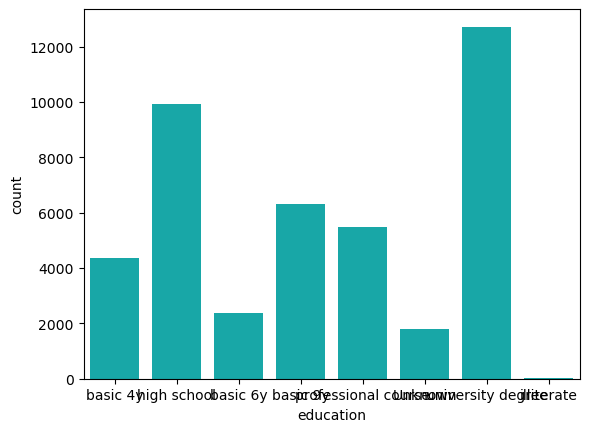

In [4]:
# creamos una primera gráfica usando el método 'sns.countplot()' 
# en este caso vemos que hay algunas cosas que se podrían cambiar, como por ejemplo que nombres de los distintos niveles de educación no se leen
# o por ejemplo podríamos querer que las barras estén ordenadas de mayor a menor. 
sns.countplot(x = "education", 
              data = df, 
              color = "c");

In [5]:
df["education"].unique()

array(['basic 4y', 'high school', 'basic 6y', 'basic 9y',
       'professional course', 'Unknown', 'university degree',
       'illiterate'], dtype=object)

Lo primero que vamos a hacer es rotar las etiquetas del eje x, para que las podamos leer mejor. Para usaremos el método `plt.xticks()`.  Se utiliza para personalizar las marcas (etiquetas) en el eje X de un gráfico. Entre otras cosas, permite especificar las ubicaciones y las etiquetas que deseamos mostrar en el eje X. Esto es útil cuando deseas ajustar cómo se muestran los valores en el eje X para que sean más legibles o para resaltar ciertas categorías. También nos puede ayudar a rotar las etiquetas, lo cual es nuestro objetivo. 

La sintaxis básica de `plt.xticks()` es la siguiente:

```python
# en caso de que estemos trabajando con gráficas individuales
plt.xticks(ticks, labels, rotation) # para modific9ar el eje x
plt.yticks(ticks, labels, rotation) # para modificar el eje y

# al igual que en los otros métodos, cuando queremos incluirlo en subplots es un poco diferente, en este caso usaremos:
axes[n].set_xticks()
axes[n].set_yticks()
```
Donde: 

- `ticks`: Es una lista o array que contiene las posiciones en el eje X donde deseas colocar las marcas. Pueden ser números que representen las ubicaciones de las categorías.

- `labels`: Es una lista o array que contiene las etiquetas que deseas mostrar en las marcas del eje X, correspondientes a las posiciones especificadas en `ticks`.

- `rotation`: Valor numérico que representa el ángulo de rotación en grados de las etiquetas. Puedes usar valores positivos (rotación en sentido de las agujas del reloj) o negativos (rotación en sentido contrario a las agujas del reloj).


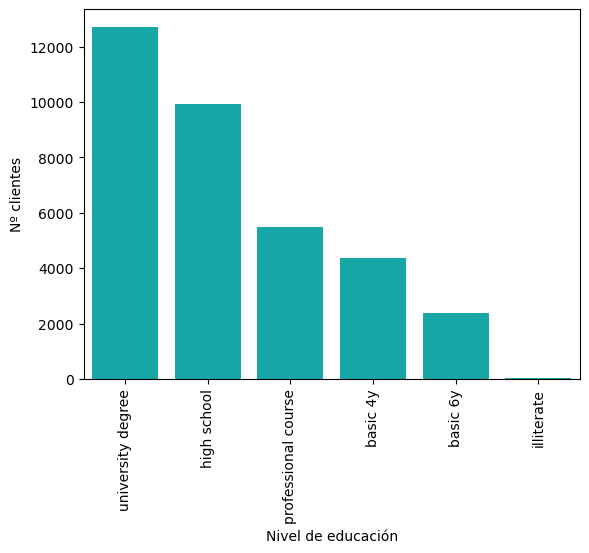

In [6]:
# volvemos a construir la gráfica usando un 'sns.countplot()'
# en este caso hemos añadido el parámetro 'order' para ordenar el nombre de las etiquetas y que aparezcan las barras de mayor cantidad a menor. 
sns.countplot(x = "education", 
              data = df,
              color = "c", 
              order = ['university degree', 'high school', 'professional course', 'basic 4y', 'basic 6y', 'illiterate'])

# giramos las etiquetas del eje "x", en este caso a 90º. En este caso solo vamos a usar el parámetro 'rotation', 
# más adelante veremos mas ejemplos para usar los otros parámetros. 
plt.xticks(rotation = 90)

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()' ya que estamos creando solo una gráfica
plt.xlabel("Nivel de educación")
plt.ylabel("Nº clientes");

**¿Cómo interpretamos esta gráfica?**

Esta tal vez sea la gráfica con la que más familiarizadas estaremos. Lo que hace esta gráfica es contar el número de veces que aparece cada una de las categorías en el *DataFrame*. Es decir, es como un value_counts(), pero en una gráfica. En este caso vemos, que la mayoría de los clientes tienen un grado universitario, seguidos de los clientes que tienen estudios hasta el instituto. 

Para ver esto vamos a contestar a la siguiente pregunta:

> ¿Depende el nivel educativo de los clientes en que acepten o no una oferta (`y`)? En este caso podríamos ver que tipo de clientes aceptan o no la oferta. 


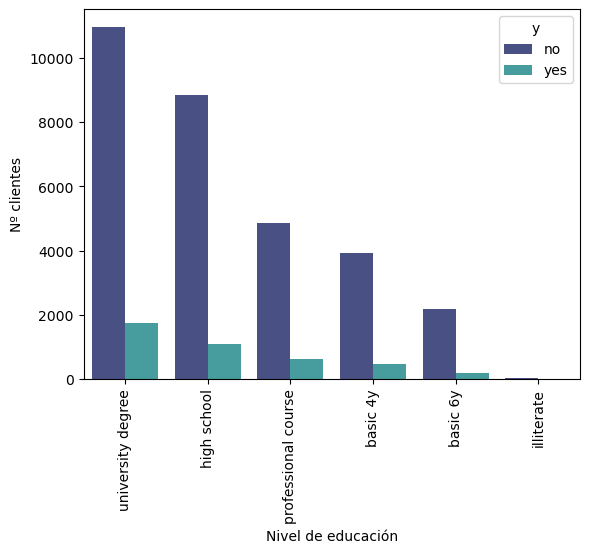

In [7]:
# para hacer esta gráfica vamos a reutilizar el código que hicimos para la gráfica anterior y le vamos a añadir el parámetro 'hue' en el 'sns.countplot()'
# 📌 fijaos como hemos añadido el parámetro hue en el código
# 
sns.countplot(x = "education", 
              data = df, 
              palette = "mako", 
              order = ['university degree', 'high school', 'professional course', 'basic 4y', 'basic 6y', 'illiterate'], 
              hue = "y")

# giramos las etiquetas del eje "x",  
plt.xticks(rotation = 90)

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()'
plt.xlabel("Nivel de educación")
plt.ylabel("Nº clientes"); 

**¿Cómo interpretamos la gráfica?** 

Igual que la gráfica sin `hue` la hemos comparado con un *value_counts()*, esta gráfica la podemos comparar con un *groupby* en el cual agrupamos por dos variables. De la misma forma, nos esta diciendo cuantos clientes tengo por tipo de educación igual que teníamos en la gráfica anterior, solo que en este casi hemos añadido una categoría extra, que es si aceptan o no la oferta. En general vemos que, independiente del nivel educativo, se rechazan mas ofertas de las que se aceptan. 

Vamos a poner el último de los ejemplos de este tipo de gráfica. En este caso contestaremos a la pregunta: 

> ¿Depende el hecho de haber aceptado o no una oferta en el pasado (`poutcome`) en que acepten o no una oferta (`y`)? En este caso podríamos ver que tipo de clientes aceptan o no la oferta. 

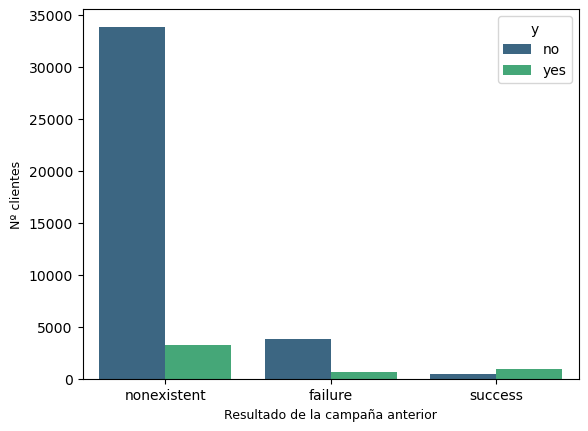

In [8]:
# para hacer esta gráfica vamos a reutilizar el código que hicimos para la gráfica anterior y le vamos a añadir el parámetro 'hue' en el 'sns.countplot()'
# 📌 fijaos como hemos añadido el parámetro hue en el código
# 
sns.countplot(x = "poutcome", 
              data = df, 
              palette = "viridis", 
              hue = "y")

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()'
plt.xlabel("Resultado de la campaña anterior", fontsize = 9)
plt.ylabel("Nº clientes",  fontsize = 9); 

**¿Cómo interpretamos esta gráfica?**

En este caso vemos que los clientes que no aceptaron otras campañas de marketing (*nonexistent* y *failure*) no aceptaron en esta campaña de marketing. Mientras que en el caso de los que si aceptaron en otras campañas si que aceptaron más.

## Pieplot o Gráfico de quesitos

Es un tipo de gráfico utilizado para mostrar la proporción de diferentes partes en relación con un todo. Se representa como un círculo dividido en sectores, donde cada sector representa una categoría y su tamaño angular está en proporción a la cantidad que representa dentro del conjunto total.

Sintaxis básica de un pie chart utilizando la librería Matplotlib (**en seaborn no tenemos este tipo de gráfico**):

```python
plt.pie(valores, labels, autopct, startangle, data, colors)
```

> ¿Cuál es el nivel educativo (`education`) más común? Con esta pregunta podremos saber que perfil educativo domina más entre nuestros clientes.

In [9]:
df.head(1)

,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,empvarrate,conspriceidx,consconfidx,nremployed,y,date,latitude,longitude,contact_month,contact_year,age_cat,hijos_totales,age,euribor3m,pdays
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,housemaid,married,basic 4y,No,No,No,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,5191,no,2-agosto-2019,41.495,-71.233,agosto,2019.0,Adultos mayores,1 hijos,40.005436,4.857,4.4


In [10]:
# empezamos preparando los datos para poder hacer el pieplot usando un groupby. En este caso tendremos que contar el número de clientes que tenemos por nivel educativo
df_educacion = df.groupby("education")["id"].count().reset_index()
df_educacion

,education,id
0,Unknown,1807
1,basic 4y,4356
2,basic 6y,2386
3,basic 9y,6309
4,high school,9925
5,illiterate,18
6,professional course,5477
7,university degree,12722


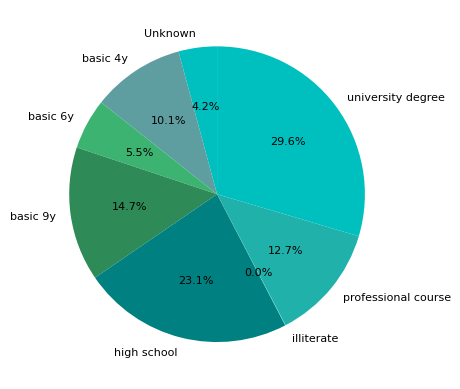

In [11]:
# lo primero que vamos a hacer es definir una lista para definir los colores que queremos para cada una de las categorías. 
# Esta lista debe tener tantos elementos como categorías tenemos en la columna de estudio (en este caso 7)
colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]


# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie("id", labels= "education",
        data = df_educacion, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);

¿Qué es lo que significa eso que hemos puesto en el parámetro *autopct*?

- `'%'`: Este carácter es un literal que se traduce directamente a un signo de porcentaje (%) en la cadena formateada. Indica que el número formateado será seguido por un signo de porcentaje.

- `'1.1f'`: Especifica cómo se formateará el número. Aquí tienes una explicación más detallada:
  - `1`: El primer dígito en esta sección (antes del punto) indica el ancho mínimo total del campo. En este caso, significa que el campo tendrá al menos 1 carácter.

  - `.1`: La parte después del punto decimal indica cuántos dígitos después del punto decimal deben mostrarse. En este caso, solo se muestra un dígito después del punto decimal.

  - `f`: Indica que el número se formateará como un número de punto flotante.
 

# Análisis de la relación entre variables numéricas y categóricas

En este apartado de la lección, casi todas las gráficas que vamos a usar ya las hemos aprendido a lo largo de la lección.

En este caso las preguntas que nos plantearemos para contestar son:

- ¿Cómo se distribuyen los ingresos en función del estado civil? Con esto podríamos ver si las personas casadas tienen más ingresos que las que están solteras. 

- ¿Existen diferencias notables en los ingresos entre diferentes estados civiles?

- ¿Cuál es el ingreso promedio para cada estado civil?
- ¿Los diferentes estados civiles muestran diferencias significativas en términos de ingresos promedio?


- ¿Cómo se superponen o difieren las distribuciones de ingresos entre diferentes estados civiles?

- ¿La relación entre ingresos y estado civil ha cambiado a lo largo del tiempo? (Puedes usar la variable "contact_year" para explorar esta relación a lo largo de los años).

- ¿Qué estadísticas descriptivas (como la media, mediana y desviación estándar) se pueden calcular para los ingresos en cada estado civil?

- ¿Cómo se distribuyen los ingresos en función del estado civil? ¿Hay valores atípicos?


En este caso, lo que haremos será crear un subplot con cuatro gráficas: 

- *boxplot*: Ya sabemos como es su sintaxis por lo que no nos extenderemos en su sintaxis.

- *violinplot*: Ya sabemos como es su sintaxis por lo que no nos extenderemos en su sintaxis.

- *barplot*: Es una gráfica nueva, por lo que vamos a pasar a entender su sintaxis. De este tipo de gráfica tendremos dos, una usando Matplotlib y otra Seaborn. 

## Barplot

Es una visualización que representa datos categóricos utilizando barras rectangulares.
**Sintaxis de un *barplot* usando Matplotlib**


```python
plt.bar(categorias, height, data , color)  
```

**Sintaxis de un *barplot* usando Seaborn**


```python
sns.barplot(x, y, palette, ci, hue)
```


Empezaremos contestando la siguiente pregunta:

> ¿Cómo se distribuyen los ingresos en función del estado civil? Con esto podríamos ver si las personas casadas tienen más ingresos que las que están solteras. 



📌 **NOTA SUPER IMPORTANTE**

Si bien cuando hacemos un *barplot* con Seaborn no hace falta que hagamos ningún calculo previo, en el caso de Matplotlib si que lo tendremos que hacer, al igual que hicimos con el *pieplot*. Por lo tanto, lo primero que haremos será calcular la media de edad para cada una de las categorías, para lo que usaremos un *groupby*

In [12]:
df_marital_matplt = df.groupby("marital")["income"].mean().reset_index()
df_marital_matplt

,marital,income
0,divorced,93684.009146
1,married,93240.390776
2,single,93066.954316


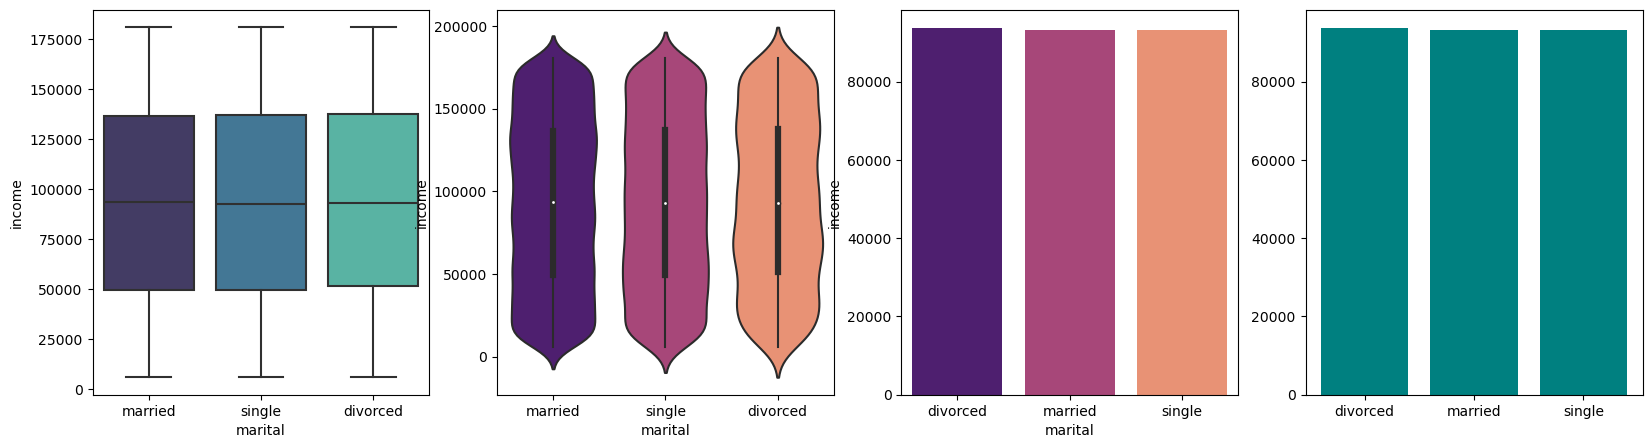

In [13]:
# comenzamos empezando estableciendo nuestra gráfica y indicando el número de filas y columnas que queremos
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20,5))

# creamos un boxplot, recordemos que en el caso de Seaborn para indicar en el subplot lo queremos tenemos que usar el parámetro 'ax' dentro del método de la función
# fijaos que la única diferencia con los boxplot que hemos creado previamente es que hemos añadido el parametro 'y' 
sns.boxplot(x = "marital",
            y = "income", 
            data = df, 
            ax = axes[0], 
            palette= "mako")

# hacemos lo mismo para el violinplot
sns.violinplot(x = "marital", 
               y = "income", 
               data = df, 
               ax = axes[1], 
               palette = "magma")

# creamos nuestro primer barplot. 📌 LO QUE NOS MUESTRA ES LA MEDIA DE EDAD EN FUNCIÓN DEL ESTADO CIVIL
sns.barplot(x = "marital", 
            y = "income", 
            data = df_marital_matplt, 
            ax = axes[2], 
            palette = "magma")


# creamos un barplot usando Matplotlib, el método 'plt.bar()' 
axes[3].bar(x = "marital", 
            height=  "income", 
            data = df_marital_matplt,
            color = "teal");

Quedan un par de detalles para tener la gráfica perfecta: 

1- En la última gráfica vemos que no hay nombre en el eje de las `x` ni de la `y`. Para solucionar esto, simplemente tendremos que usar el método `.set_xlabel()` y `.set_ylabel()`

2- Ciertas etiquetas de las gráficas se superponen, y hace que no se vea bien el nombre de los ejes. Para esto usaremos un nuevo método llamado `tigth_layout()`. Su objetivo principal es ajustar automáticamente los elementos en un gráfico o figura para que se ajusten adecuadamente dentro del área de la gráfica sin superponerse ni recortarse.


''

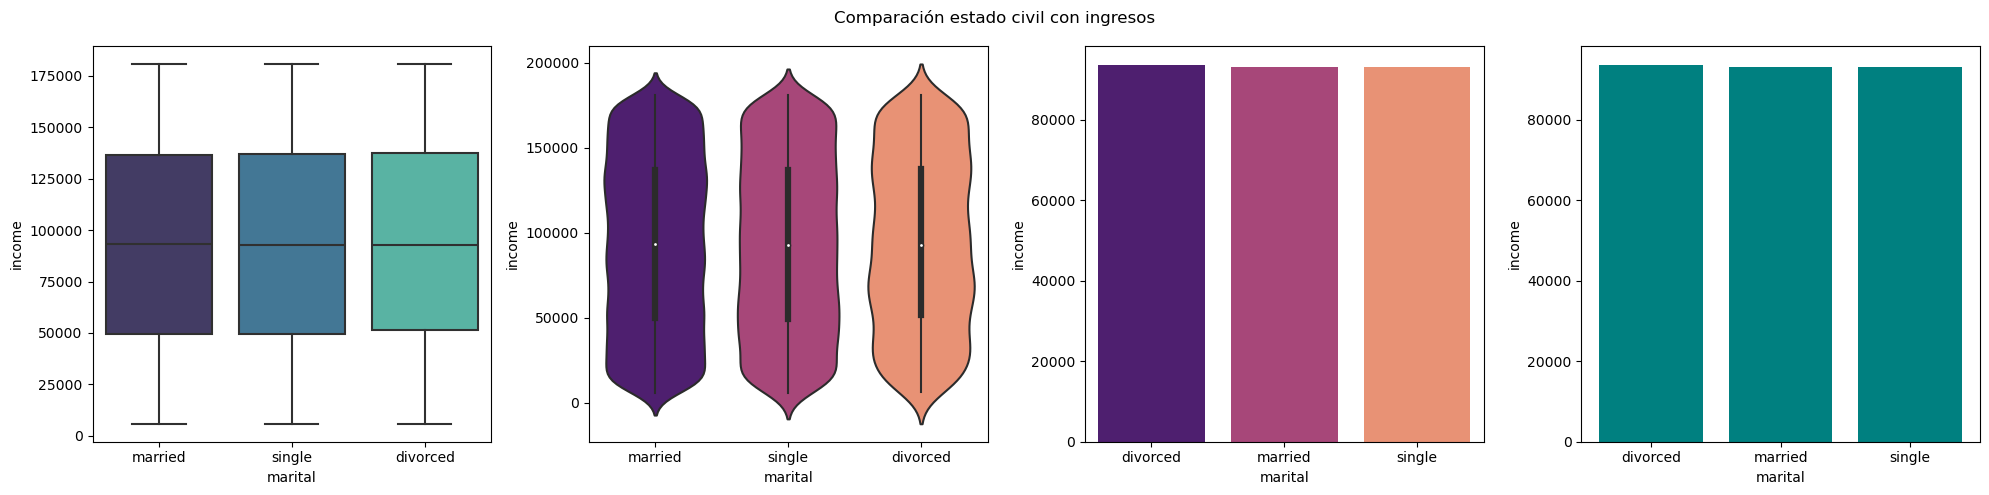

In [14]:
# comenzamos empezando estableciendo nuestra gráfica y indicando el número de filas y columnas que queremos
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20,5))

# creamos un boxplot, recordemos que en el caso de Seaborn para indicar en el subplot lo queremos tenemos que usar el parámetro 'ax' dentro del método de la función
# fijaos que la única diferencia con los boxplot que hemos creado previamente es que hemos añadido el parametro 'y' 
sns.boxplot(x = "marital", 
            y = "income", 
            data = df, 
            ax = axes[0], 
            palette= "mako")

# hacemos lo mismo para el violinplot
sns.violinplot(x = "marital", 
               y = "income", 
               data = df, 
               ax = axes[1], 
               palette = "magma")

# creamos nuestro primer barplot. 📌 LO QUE NOS MUESTRA ES LA MEDIA DE EDAD EN FUNCIÓN DEL ESTADO CIVIL
sns.barplot(x = "marital", 
            y = "income", 
            data = df_marital_matplt,
            ax = axes[2], 
            palette = "magma")

# creamos un barplot usando Matplotlib, el método 'plt.bar()' 
axes[3].bar(x = "marital", 
            height=  "income", 
            data = df_marital_matplt, 
            color = "teal")

# añadimos los nombres de los ejes a la última gráfica
axes[3].set_xlabel("marital")
axes[3].set_ylabel("income")


# añadimos título al conjunto de todas las gráficas usando '.suptitle()'
plt.suptitle("Comparación estado civil con ingresos")

# añadimos el 'plt.tigth_layout()' para que se ajusten los elementos de la gráfica
plt.tight_layout()
;



# Ejercicios

Utilizando el conjunto de datos que terminamos de limpiar ayer, contesta a las siguientes preguntas utilizando la visualización más apropiada. 

1.  ¿Cómo se distribuyen los precios de los productos?

2. ¿Cuál es la relación entre el precio y la calificación promedio de los productos? 

3. ¿Qué porcentaje de productos tiene el distintivo "Producto local"?

4.  ¿Qué porcentaje de productos tiene el distintivo "Buena calidad del producto".

5.  ¿Cómo se distribuyen los precios de los productos en función de si se utilizan anuncios promocionales (`uses_ad_boosts`) o no?

6. ¿Existe una relación entre el uso de anuncios y las unidades vendidas? 

7. ¿Cuál es la distribución de las calificaciones de los empleados (`rating_employee`) para los productos que tienen el distintivo "Buena calidad del producto" (`badge_product_quality`) y para los que no lo tienen? Haced que las dos gráficas tengan la misma escala en los dos ejes. 

8. ¿Qué países reciben más productos de este conjunto de datos? Muestra un gráfico de barras horizontales.

9. ¿Cómo varía el precio promedio de los productos por país de origen?

10. ¿Cuál es la relación entre el precio de envío y las unidades vendidas?

11. Compara diferentes distribuciones de precios de productos en función de si tienen el distintivo "Producto local" o "Buena calidad del producto". Tendréis que crear dos gráficas en un subplot, en la primera poner los precios de los productos locales ("badge_local_product")


In [18]:
df = pd.read_csv('df_nulos_imputados.csv', index_col=0)
df.head(2)

,index_x,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating_x,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id,product_url,product_id,index_y,merchant_id.1,listed_products,total_units_sold,mean_units_sold_per_product,rating_y,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,local_product,discount_percentage,seller_reputation
0,0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,100,No,3.76,54,26.0,8.0,10.0,1.0,9.0,No,Buena,No,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,Livraison standard,4,No,34,50,CN,zgrdejia,Unknown,568,595097d6a26f6e070cb878d1,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,5e9ae51d43d6a96e303acdb0,822,595097d6a26f6e070cb878d1,1,100,100.0,4.129,568.0,16.00,14.00,54.0,No,-14.29,Buena
1,1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,20000,Sí,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,No,Buena,No,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,Livraison standard,2,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/58940d436a0d3d5da4e95a38,58940d436a0d3d5da4e95a38,65,56458aa03a698c35c9050988,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,No,63.64,Regular


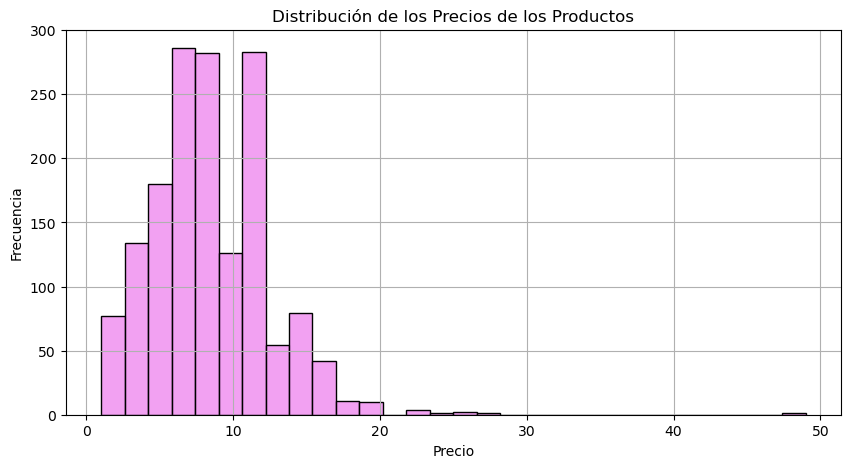

In [28]:
plt.figure(figsize=(10, 5))

# Histograma
sns.histplot(df, x='price', color='violet', bins=30)

# Personalización
plt.title('Distribución de los Precios de los Productos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [ ]:
# Distribución con desvio a la derecha? 

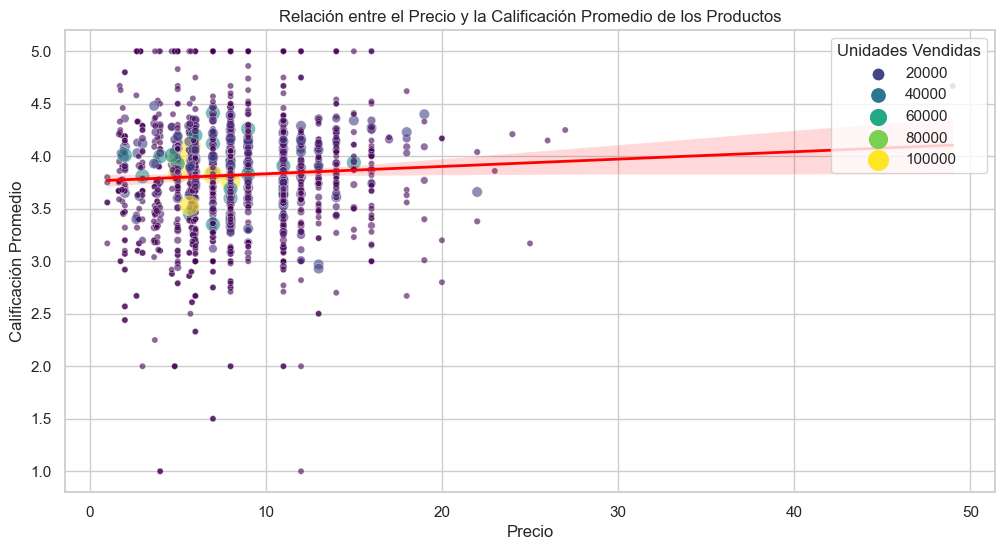

In [30]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# Scatter plot con una línea de regresión
sns.scatterplot(data=df, x='price', y='rating_x', hue='units_sold', palette='viridis', size='units_sold', sizes=(20, 200), alpha=0.6)
sns.regplot(data=df, x='price', y='rating_x', scatter=False, color='red', line_kws={'linewidth': 2})

# Personalización del gráfico
plt.title('Relación entre el Precio y la Calificación Promedio de los Productos')
plt.xlabel('Precio')
plt.ylabel('Calificación Promedio')
plt.legend(title='Unidades Vendidas', loc='upper right')
plt.grid(True)

plt.show()


In [ ]:
# Los datos no están relacionados.

In [37]:
df1 = (df.groupby('badge_local_product')['product_id'].count()/df.shape[0]*100).reset_index()
df1

,badge_local_product,product_id
0,No,98.156389
1,Sí,1.843611


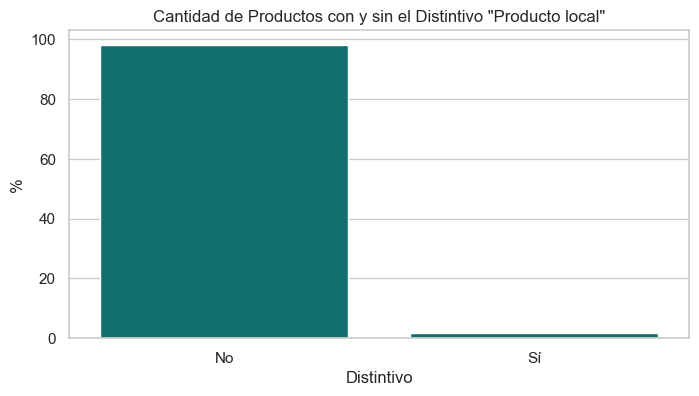

In [44]:
plt.figure(figsize=(8, 4))
sns.barplot(x='badge_local_product', y='product_id', data=df1, color='teal')
plt.title('Cantidad de Productos con y sin el Distintivo "Producto local"')
plt.xlabel('Distintivo')
plt.ylabel('%')
plt.show()


In [43]:
df2 = (df.groupby('badge_product_quality')['product_id'].count()/df.shape[0]*100).reset_index()
df2

,badge_product_quality,product_id
0,Buena,92.561983
1,Excelente,7.438017


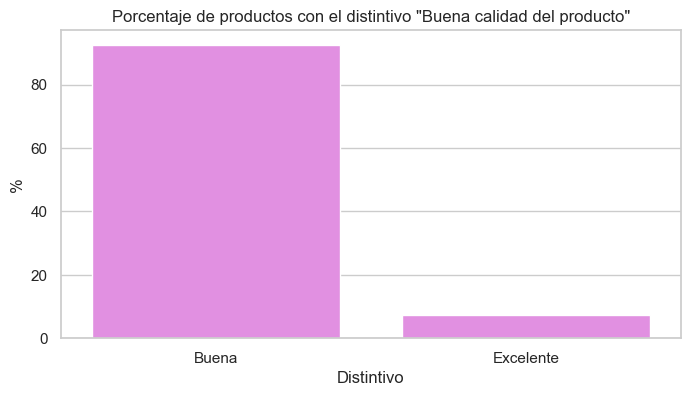

In [46]:
plt.figure(figsize=(8, 4))
sns.barplot(x='badge_product_quality', y='product_id', data=df2, color='violet')
plt.title('Porcentaje de productos con el distintivo "Buena calidad del producto"')
plt.xlabel('Distintivo')
plt.ylabel('%')
plt.show()


In [49]:
df.head(2)

,index_x,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating_x,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id,product_url,product_id,index_y,merchant_id.1,listed_products,total_units_sold,mean_units_sold_per_product,rating_y,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,local_product,discount_percentage,seller_reputation
0,0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,100,No,3.76,54,26.0,8.0,10.0,1.0,9.0,No,Buena,No,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,Livraison standard,4,No,34,50,CN,zgrdejia,Unknown,568,595097d6a26f6e070cb878d1,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,5e9ae51d43d6a96e303acdb0,822,595097d6a26f6e070cb878d1,1,100,100.0,4.129,568.0,16.00,14.00,54.0,No,-14.29,Buena
1,1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,20000,Sí,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,No,Buena,No,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,Livraison standard,2,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/58940d436a0d3d5da4e95a38,58940d436a0d3d5da4e95a38,65,56458aa03a698c35c9050988,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,No,63.64,Regular


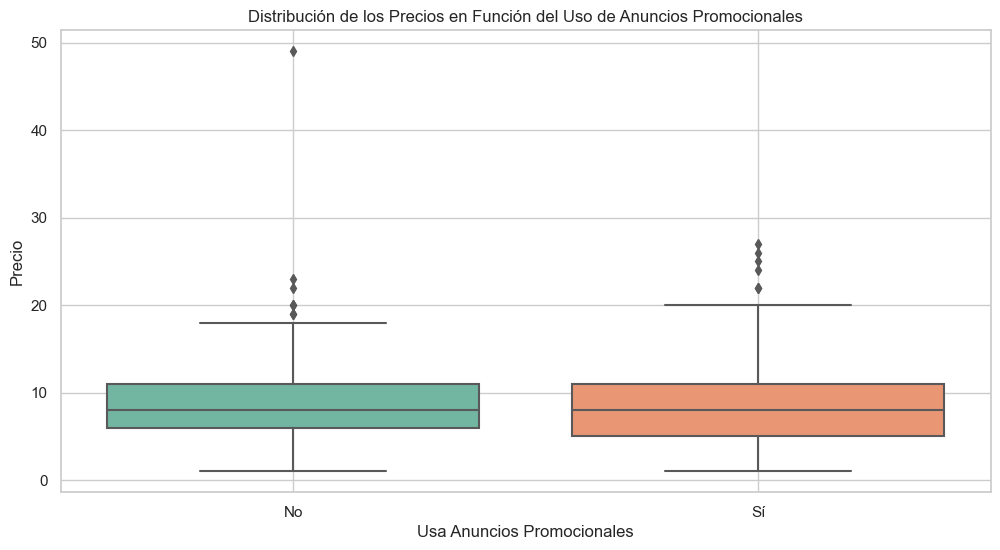

In [48]:
plt.figure(figsize=(12, 6))

# Gráfico de caja para comparar distribuciones de precios
sns.boxplot(data=df, x='uses_ad_boosts', y='price', palette='Set2')

# Personalización del gráfico
plt.title('Distribución de los Precios en Función del Uso de Anuncios Promocionales')
plt.xlabel('Usa Anuncios Promocionales')
plt.ylabel('Precio')
plt.xticks([0, 1], ['No', 'Sí'])  # Etiquetas personalizadas para el eje x
plt.grid(True)

plt.show()

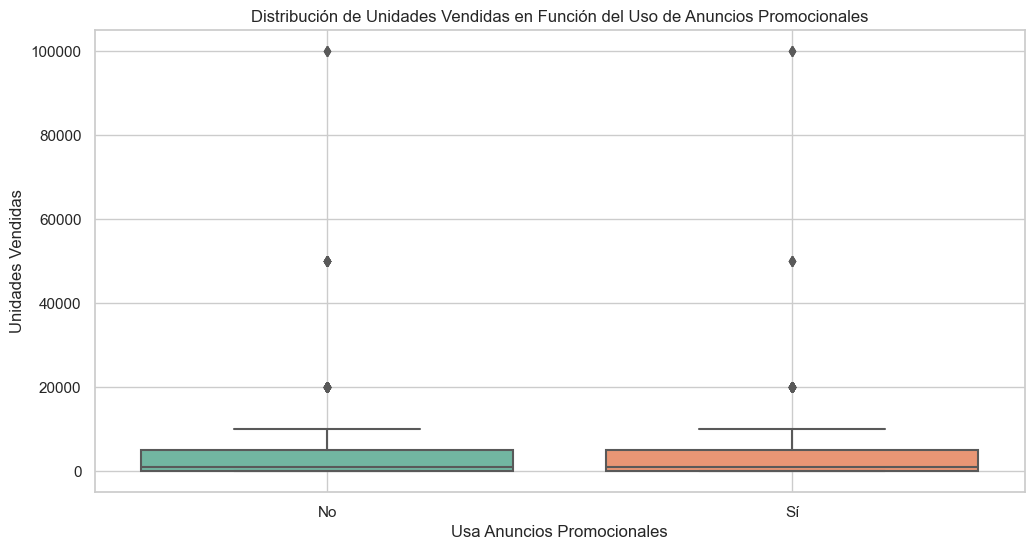

In [50]:
# Gráfico de Caja
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='uses_ad_boosts', y='units_sold', palette='Set2')
plt.title('Distribución de Unidades Vendidas en Función del Uso de Anuncios Promocionales')
plt.xlabel('Usa Anuncios Promocionales')
plt.ylabel('Unidades Vendidas')
plt.xticks([0, 1], ['No', 'Sí'])
plt.grid(True)
plt.show()

# Gráfico de Violín
# plt.figure(figsize=(12, 6))
# sns.violinplot(data=df, x='uses_ad_boosts', y='units_sold', palette='Set2')
# plt.title('Distribución de Unidades Vendidas en Función del Uso de Anuncios Promocionales')
# plt.xlabel('Usa Anuncios Promocionales')
# plt.ylabel('Unidades Vendidas')
# plt.xticks([0, 1], ['No', 'Sí'])
# plt.grid(True)
# plt.show()


In [ ]:
# Preparar la figura
plt.figure(figsize=(14, 7))

# Crear el gráfico de cajas
box_plot = sns.boxplot(data=df, x='badge_product_quality', y='rating_employee', palette='Set2')

# Configurar los límites de los ejes
min_y = df['rating_employee'].min()
max_y = df['rating_employee'].max()
plt.ylim(min_y, max_y)

# Personalización del gráfico
plt.title('Distribución de las Calificaciones de los Empleados en Función del Distintivo "Buena Calidad del Producto"')
plt.xlabel('Buena Calidad del Producto')
plt.ylabel('Calificación del Empleado')
plt.xticks([0, 1], ['No', 'Sí'])  # Etiquetas personalizadas para el eje x
plt.grid(True)

plt.show()
